# Modules

In [2]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

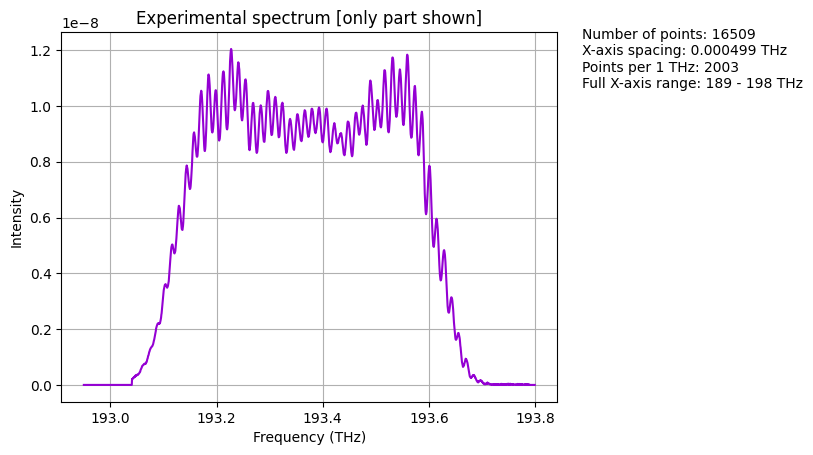

[ 7.62307917e-08 -7.56802677e-08  7.40449268e-08 -7.13728282e-08
  6.77419857e-08 -6.32573419e-08  5.80467268e-08 -5.22559870e-08
  4.60435031e-08 -3.95743424e-08]
[-3.67246622e-11  3.34676078e-11 -3.13483865e-11  3.07294521e-11
 -3.18845859e-11  3.49700158e-11 -4.00034772e-11  4.68531406e-11
 -5.52375947e-11  6.47372363e-11]


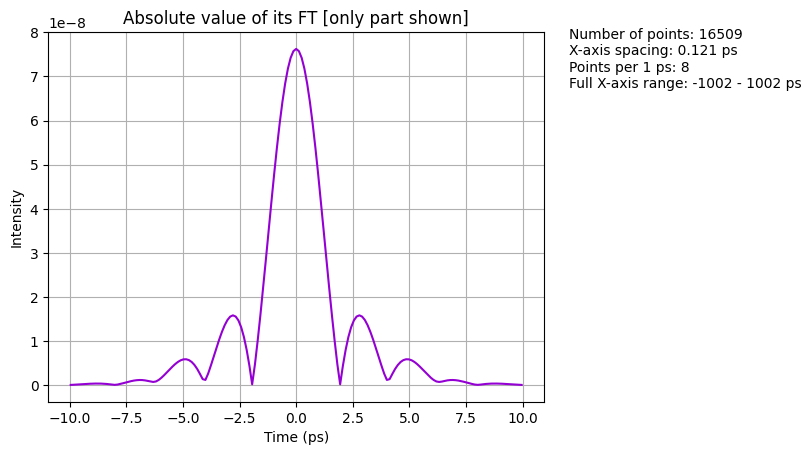

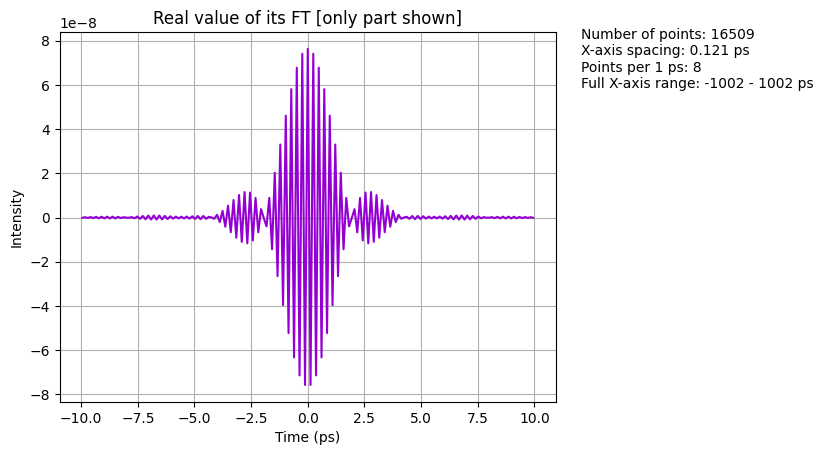

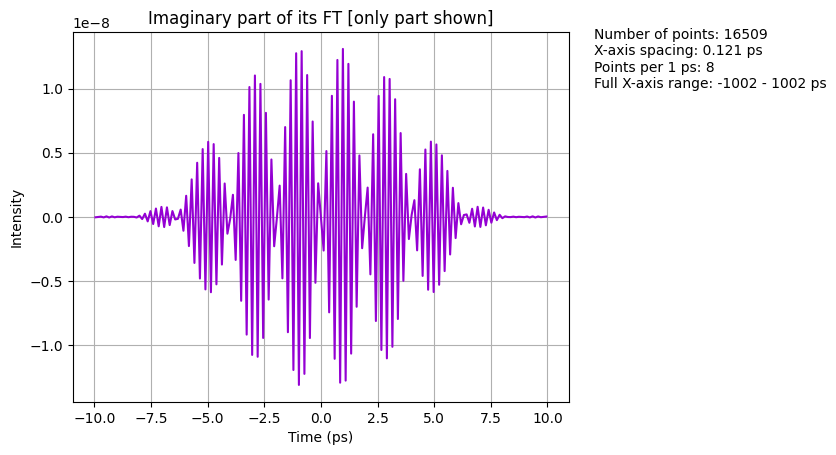

In [73]:
s = sa.load_csv("data/80d40c_shear.csv")
s.wl_to_freq()
s.zero_padding(5)
sa.plot(s, start = 192.95, end = 193.8, title = "Experimental spectrum")
s.fourier()
sa.plot(s, what_to_plot = "abs", start = -10, end = 10, title = "Absolute value of its FT")
'''
for i in np.arange(0, len(s), 2):
    s.Y[i] *= -1
'''
sa.plot(s, what_to_plot = "real", start = -10, end = 10, title = "Real value of its FT")
sa.plot(s, what_to_plot = "imag", start = -10, end = 10, title = "Imaginary part of its FT")

# Analysis

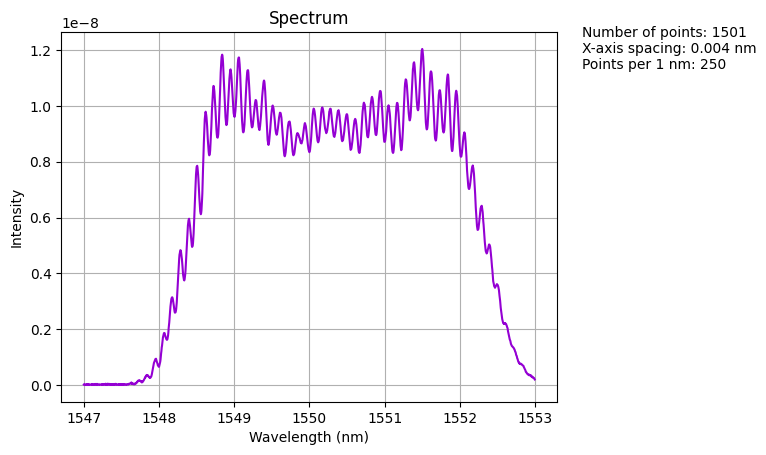

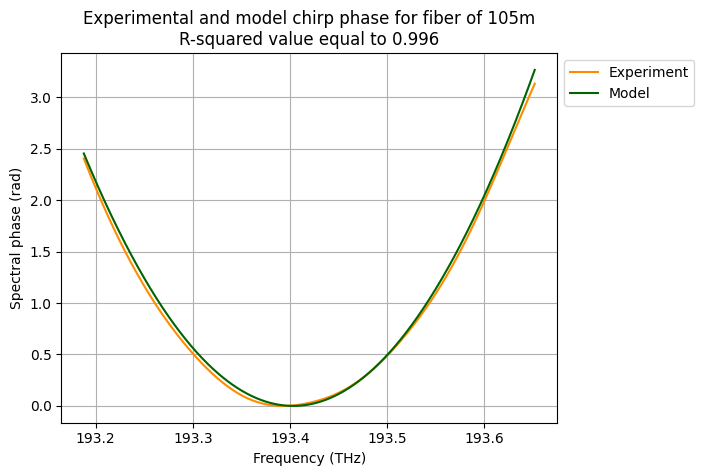

0.9964284448955602

In [11]:
shear = sa.find_shear("data/80d40c_shear.csv", 
            "data/80d40c_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = False)

spectre = sa.load_csv("data/80d40c_shear.csv")
sa.plot(spectre)

phase = sa.spider("data/80d40c_pspectrum.csv", 
          "data/80d40c_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase, 105, True)

In [ ]:
def loss(input_spectrum, target_spectrum, phase):

    input_spectrum.fourier()
    input_spectrum.Y *= np.exp(1j*phase)
    input_spectrum.inv_fourier()
    square_error = np.sum((input_spectrum.Y-target_spectrum.Y)**2)
    return square_error